In [9]:
from sklearn import decomposition ,datasets,linear_model
import numpy as np
import time
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

### We compare the performance of logistic regression on the breast cancer dataset ,first without PCA and then with PCA 


The brest cancer dataset contains 30 features and we will reduce the dimensionality to 15 features and compare
 the time and accuracy of both the models

In [10]:
breast_cancer=datasets.load_breast_cancer()

In [11]:
X=breast_cancer.data
Y=breast_cancer.target

In [12]:
X.shape

(569, 30)

In [13]:
sc=StandardScaler()
X_std=sc.fit_transform(X)

In [40]:
x_train,x_test,y_train,y_test=train_test_split(X_std,Y,random_state=0)

First we will create PCA object without passing no. of componenets to just get the explained_variance_ratio
for performing our analysis of how many components we should take .After getting the optimal components with desired 
variance ,we will again make a new PCA object with 'k' no. of components

In [34]:
pca=decomposition.PCA()

In [35]:
pca.fit(x_train)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [36]:
pca.explained_variance_ratio_

array([4.37115847e-01, 1.95131993e-01, 9.59119872e-02, 6.43895478e-02,
       5.70479896e-02, 4.04868428e-02, 2.19216823e-02, 1.43185264e-02,
       1.43088652e-02, 1.15957145e-02, 1.03362894e-02, 8.59149779e-03,
       7.65527524e-03, 4.80695206e-03, 3.10799443e-03, 2.61803913e-03,
       2.05954803e-03, 1.76552125e-03, 1.51303543e-03, 1.03436864e-03,
       1.01760063e-03, 8.43501021e-04, 7.12092777e-04, 5.95330294e-04,
       5.49894519e-04, 2.62951796e-04, 2.21816398e-04, 4.87389600e-05,
       2.68022711e-05, 3.75492011e-06])

In [39]:
k = 0
total = 0
while total <.99:
    total = total + pca.explained_variance_ratio_[k]  #adding variance ratio 
    k = k + 1
k


17

Here the optimal value of k(no of components to take is 17) with maintaining 99% variance

In [41]:
pca=decomposition.PCA(n_components=k)
x_train_pca=pca.fit_transform(x_train)
x_test_pca=pca.transform(x_test)

In [42]:
lr=linear_model.LogisticRegression()
start=time.time()
lr.fit(x_train,y_train)
end=time.time()
print(end-start)
print(lr.score(x_test,y_test))

0.015602827072143555
0.965034965034965


In [45]:
lr=linear_model.LogisticRegression()
start=time.time()
lr.fit(x_train_pca,y_train)
end=time.time()
print(end-start)
print(lr.score(x_test_pca,y_test))

0.015586376190185547
0.958041958041958


In [49]:
pca.explained_variance_

array([13.02746837,  5.81556555,  2.85848795,  1.91901713,  1.70021491,
        1.20663908,  0.65333715,  0.42673847,  0.42645054,  0.34558986,
        0.30805491,  0.25605447,  0.228152  ,  0.14326274,  0.0926283 ,
        0.07802605,  0.0613812 ])

In [50]:
pca.components_

array([[ 2.28240979e-01,  9.59082795e-02,  2.35480422e-01,
         2.34434752e-01,  1.37145319e-01,  2.28171889e-01,
         2.54340322e-01,  2.64690199e-01,  1.31731874e-01,
         4.86826974e-02,  2.18803482e-01,  6.03456600e-03,
         2.18141293e-01,  2.21402086e-01,  1.31790832e-02,
         1.52030562e-01,  1.39231779e-01,  1.69025004e-01,
         2.70385692e-02,  9.53426441e-02,  2.38132485e-01,
         9.86220297e-02,  2.44674933e-01,  2.39542237e-01,
         1.27298498e-01,  1.98472931e-01,  2.14882667e-01,
         2.51519739e-01,  1.18001710e-01,  1.21392651e-01],
       [-2.21347830e-01, -4.85254345e-02, -2.03445909e-01,
        -2.22288570e-01,  1.84308320e-01,  1.54813769e-01,
         7.87151969e-02, -1.74711359e-02,  2.02716767e-01,
         3.57105128e-01, -1.02614253e-01,  9.04739174e-02,
        -9.32050601e-02, -1.53474054e-01,  1.95575209e-01,
         2.30514589e-01,  2.27431775e-01,  1.53727058e-01,
         1.79476881e-01,  2.81108036e-01, -2.06943986e-

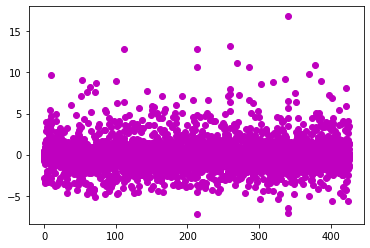

In [51]:
from matplotlib import pyplot as plt
plt.plot(x_train_pca, 'o',color="m")
plt.show()